# Model recovery attack: `wine`

In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import mra
from mra import *
import models
from models import *

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
def make_dataset(X, Y, f):
    x = tf.data.Dataset.from_tensor_slices(X)
    y = tf.data.Dataset.from_tensor_slices(Y)
    x = x.map(f)
    xy = tf.data.Dataset.zip((x, y))
    xy = xy.shuffle(10000)
    return xy

xy = np.loadtxt("../datasets/wine-white.csv", delimiter=";")
np.random.shuffle(xy)
x = xy[:,0:-1]
y = xy[:,-1]-3

x = (x-np.min(x, axis=0))/(np.max(x, axis=0) - np.min(x, axis=0))
y = y.reshape((len(x), 1)).astype("float32")
train_ds = make_dataset(x, y, lambda t: t)

2022-03-30 04:55:07.544094: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-30 04:55:07.544172: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: xgpd0
2022-03-30 04:55:07.544192: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: xgpd0
2022-03-30 04:55:07.544381: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.103.1
2022-03-30 04:55:07.544429: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.103.1
2022-03-30 04:55:07.544442: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.103.1
2022-03-30 04:55:07.545211: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in per

In [3]:
main = {}

for split in [2,3,4]:
    print("split = {}".format(split))
    main[split] = mra(train_ds)
    make_f, make_g, make_generator = models.make_mlp(
        attr_num=11,
        class_num=7,
        split=split,
        fg_units=64,
        fg_act="relu",
        generator_units=[256,128,64,32]
    )
    main[split].train(
        make_f,
        make_g,
        loss_fn=tf.keras.losses.SparseCategoricalCrossentropy(),
        batch_size=32,
        epoch=5,
        lr=0.001,
        verbose=True, log_every=500
    )

split = 2
Iteration 0500: Training loss: 1.1929
split = 3
Iteration 0500: Training loss: 1.1947
split = 4
Iteration 0500: Training loss: 1.1982


In [5]:
log_attack = {}
for split in [4,3,2]:
    print("split level = {}".format(split))
    log_attack[split] = main[split].attack(
        attack_iter=100,
        make_generator=make_generator,
        input_noise="normal",
        input_z=True,
        model_leak=True,
        lr_x=0.0001,
        lr_f=0.00001,
        epoch=50,
        iter_x=40,
        iter_f=1,
        verbose=True, log_every=1
    )

split level = 4
Iteration 0001: RG-uniform: 0.1909, RG-normal: 0.1503, reconstruction validation: 0.0769
Iteration 0002: RG-uniform: 0.2110, RG-normal: 0.1713, reconstruction validation: 0.0533
Iteration 0003: RG-uniform: 0.1980, RG-normal: 0.1670, reconstruction validation: 0.0552
Iteration 0004: RG-uniform: 0.1730, RG-normal: 0.1571, reconstruction validation: 0.0543
Iteration 0005: RG-uniform: 0.1827, RG-normal: 0.1501, reconstruction validation: 0.0513
Iteration 0006: RG-uniform: 0.1719, RG-normal: 0.1446, reconstruction validation: 0.0483
Iteration 0007: RG-uniform: 0.1769, RG-normal: 0.1665, reconstruction validation: 0.0403
Iteration 0008: RG-uniform: 0.1752, RG-normal: 0.1539, reconstruction validation: 0.0404
Iteration 0009: RG-uniform: 0.1761, RG-normal: 0.1521, reconstruction validation: 0.0433
Iteration 0010: RG-uniform: 0.1682, RG-normal: 0.1365, reconstruction validation: 0.0405
Iteration 0011: RG-uniform: 0.1877, RG-normal: 0.1538, reconstruction validation: 0.0388
Itera

Iteration 0093: RG-uniform: 0.1853, RG-normal: 0.1651, reconstruction validation: 0.0304
Iteration 0094: RG-uniform: 0.1891, RG-normal: 0.1426, reconstruction validation: 0.0320
Iteration 0095: RG-uniform: 0.1973, RG-normal: 0.1859, reconstruction validation: 0.0298
Iteration 0096: RG-uniform: 0.1748, RG-normal: 0.1632, reconstruction validation: 0.0362
Iteration 0097: RG-uniform: 0.1893, RG-normal: 0.1592, reconstruction validation: 0.0347
Iteration 0098: RG-uniform: 0.1995, RG-normal: 0.1587, reconstruction validation: 0.0387
Iteration 0099: RG-uniform: 0.1865, RG-normal: 0.1730, reconstruction validation: 0.0298
Iteration 0100: RG-uniform: 0.1883, RG-normal: 0.1592, reconstruction validation: 0.0325
split level = 3
Iteration 0001: RG-uniform: 0.1690, RG-normal: 0.1526, reconstruction validation: 0.0215
Iteration 0002: RG-uniform: 0.1625, RG-normal: 0.1492, reconstruction validation: 0.0114
Iteration 0003: RG-uniform: 0.1739, RG-normal: 0.1615, reconstruction validation: 0.0109
Itera

Iteration 0085: RG-uniform: 0.1758, RG-normal: 0.1481, reconstruction validation: 0.0060
Iteration 0086: RG-uniform: 0.1589, RG-normal: 0.1621, reconstruction validation: 0.0057
Iteration 0087: RG-uniform: 0.1990, RG-normal: 0.1468, reconstruction validation: 0.0051
Iteration 0088: RG-uniform: 0.1833, RG-normal: 0.1678, reconstruction validation: 0.0054
Iteration 0089: RG-uniform: 0.1795, RG-normal: 0.1509, reconstruction validation: 0.0056
Iteration 0090: RG-uniform: 0.1881, RG-normal: 0.1372, reconstruction validation: 0.0059
Iteration 0091: RG-uniform: 0.1811, RG-normal: 0.1698, reconstruction validation: 0.0061
Iteration 0092: RG-uniform: 0.1875, RG-normal: 0.1433, reconstruction validation: 0.0060
Iteration 0093: RG-uniform: 0.1638, RG-normal: 0.1574, reconstruction validation: 0.0057
Iteration 0094: RG-uniform: 0.1804, RG-normal: 0.1535, reconstruction validation: 0.0060
Iteration 0095: RG-uniform: 0.1660, RG-normal: 0.1562, reconstruction validation: 0.0074
Iteration 0096: RG-un

Iteration 0077: RG-uniform: 0.1740, RG-normal: 0.1644, reconstruction validation: 0.0016
Iteration 0078: RG-uniform: 0.1931, RG-normal: 0.1572, reconstruction validation: 0.0018
Iteration 0079: RG-uniform: 0.1783, RG-normal: 0.1551, reconstruction validation: 0.0017
Iteration 0080: RG-uniform: 0.1844, RG-normal: 0.1556, reconstruction validation: 0.0018
Iteration 0081: RG-uniform: 0.1777, RG-normal: 0.1574, reconstruction validation: 0.0019
Iteration 0082: RG-uniform: 0.1767, RG-normal: 0.1396, reconstruction validation: 0.0017
Iteration 0083: RG-uniform: 0.1745, RG-normal: 0.1706, reconstruction validation: 0.0016
Iteration 0084: RG-uniform: 0.1608, RG-normal: 0.1664, reconstruction validation: 0.0016
Iteration 0085: RG-uniform: 0.1794, RG-normal: 0.1738, reconstruction validation: 0.0017
Iteration 0086: RG-uniform: 0.1667, RG-normal: 0.1388, reconstruction validation: 0.0016
Iteration 0087: RG-uniform: 0.1851, RG-normal: 0.1766, reconstruction validation: 0.0017
Iteration 0088: RG-un

In [28]:
import pickle
with open('./log/wine.pkl', 'wb') as f:
    pickle.dump(log_attack, f)

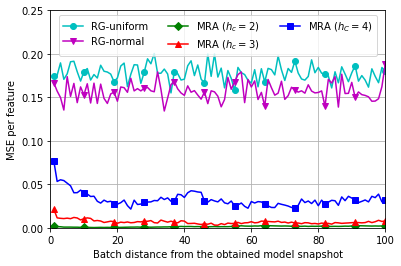

In [27]:
plt.xlim([0,100])
plt.ylim([0,0.25])
plt.grid()
plt.ylabel('MSE per feature')
plt.xlabel('Batch distance from the obtained model snapshot')
ran = [i+1 for i in range(100)]
plt.plot(
    ran, log_attack[2][:,0], 'co-',
    ran, log_attack[2][:,1], 'mv-',
    ran, log_attack[2][:,2], 'gD-',
    ran, log_attack[3][:,2], 'r^-',
    ran, log_attack[4][:,2], 'bs-',
    markevery=np.arange(0, 101, 9))
plt.legend(['RG-uniform', 'RG-normal', 'MRA ($h_c=2$)', 'MRA ($h_c=3$)', 'MRA ($h_C=4$)'], loc='upper center', ncol=3)
plt.savefig("fig/wine-white.pdf", bbox_inches='tight')